<a href="https://colab.research.google.com/github/Wisnuardhi/Praktikum-7-SPK/blob/main/Muhammad%20Wisnu%20Ardhi_Fuzzy_G.231.21.0173.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-fuzzy --upgrade
#!pip install scikit-fuzzy=0.4.2


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.7 MB/s eta 0:00:00


In [184]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import skfuzzy
pd.set_option('display.max_colwidth', 25)
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
uploaded = files.upload()

Saving UCI_Credit_Card.csv to UCI_Credit_Card.csv


In [189]:
base = pd.read_csv('UCI_Credit_Card.csv', header = 1)
base.shape

(30000, 25)

In [190]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [191]:
base['BILL_TOTAL'] = base['BILL_AMT1'] + base['BILL_AMT2'] + base['BILL_AMT3'] + base['BILL_AMT4'] + base['BILL_AMT5'] + base['BILL_AMT6']


In [192]:
base.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,BILL_TOTAL
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1,7704
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1,17077
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0,101653
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0,231334
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0,109339


In [193]:
X = base.iloc[:,[1,25]].values

In [194]:
X

array([[ 20000,   7704],
       [120000,  17077],
       [ 90000, 101653],
       ...,
       [ 30000,  70496],
       [ 80000, 266611],
       [ 50000, 230874]])

In [195]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [196]:
X

array([[-1.13672015, -0.69069198],
       [-0.3659805 , -0.66599747],
       [-0.59720239, -0.44316987],
       ...,
       [-1.05964618, -0.52525745],
       [-0.67427636, -0.00856436],
       [-0.90549825, -0.10271861]])

In [197]:
X.shape

(30000, 2)

In [171]:
X.T.shape

(2, 30000)

In [198]:
r = skfuzzy.cmeans(data = X.T, c = 3, m = 2, error = 0.005, maxiter = 1000, init = None)

In [199]:
r

(array([[-0.73893546, -0.30171072],
        [ 0.74997713,  2.01661331],
        [ 0.97507417, -0.42055307]]),
 array([[0.91181192, 0.84858612, 0.97912919, ..., 0.95010582, 0.95613081,
         0.97292926],
        [0.02591956, 0.02732201, 0.00499173, ..., 0.0149143 , 0.0140562 ,
         0.00905926],
        [0.06226852, 0.12409187, 0.01587908, ..., 0.03497989, 0.02981299,
         0.01801148]]),
 array([[0.1466933 , 0.04931542, 0.33681823, ..., 0.42261583, 0.36149307,
         0.57939132],
        [0.30371979, 0.42118613, 0.54254575, ..., 0.19334995, 0.50554899,
         0.24910858],
        [0.54958691, 0.52949845, 0.12063602, ..., 0.38403422, 0.13295794,
         0.1715001 ]]),
 array([[0.55636236, 0.52134465, 0.20024723, ..., 0.39093287, 0.30019258,
         0.25950149],
        [3.29986796, 2.90547105, 2.80453668, ..., 3.12023133, 2.47585189,
         2.68926878],
        [2.12900217, 1.36333069, 1.57243922, ..., 2.03741255, 1.70002701,
         1.90724182]]),
 array([25817.188460

In [200]:
previsoes_porcentagem = r[1]

In [201]:
previsoes_porcentagem.shape

(3, 30000)

In [202]:
previsoes_porcentagem

array([[0.91181192, 0.84858612, 0.97912919, ..., 0.95010582, 0.95613081,
        0.97292926],
       [0.02591956, 0.02732201, 0.00499173, ..., 0.0149143 , 0.0140562 ,
        0.00905926],
       [0.06226852, 0.12409187, 0.01587908, ..., 0.03497989, 0.02981299,
        0.01801148]])

In [203]:
previsoes_porcentagem[0][0]

0.9118119202107932

In [204]:
previsoes_porcentagem[1][0]


0.025919560009481143

In [205]:
previsoes_porcentagem[2][0]

0.062268519779725785

In [206]:
previsoes_porcentagem[0][0] + previsoes_porcentagem[1][0] + previsoes_porcentagem[2][0]

1.0

In [207]:
previsoes = previsoes_porcentagem.argmax(axis = 0)

In [208]:
previsoes

array([0, 0, 0, ..., 0, 0, 0])

In [209]:
previsoes[5000]

0

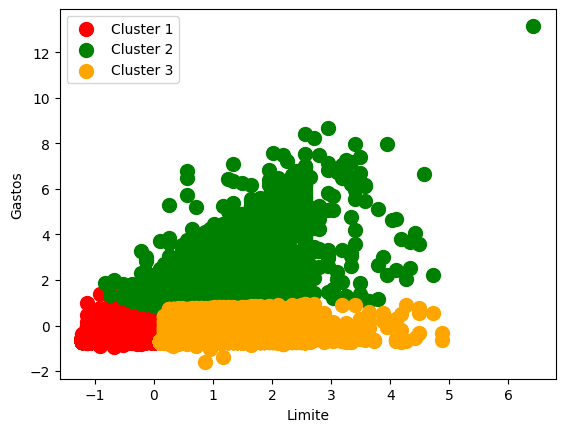

In [212]:
plt.scatter(X[previsoes == 0, 0], X[previsoes == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[previsoes == 1, 0], X[previsoes == 1, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(X[previsoes == 2, 0], X[previsoes == 2, 1], s = 100, c = 'orange', label = 'Cluster 3')
plt.xlabel('Limite')
plt.ylabel('Gastos')
plt.legend();